In [3]:
class Animal:
    def __init__(self, x, y):
        Animal.arms = x
        Animal.legs = y
        
    def limbs(self):
        return (Animal.arms + Animal.legs)
    
spider = Animal(4,4)
spidlimbs = spider.limbs()

print(spidlimbs)

8


## Class _ the Tamagotchi case

In [ ]:
# import sys
# sys.setExecutionLimit(60000)
from random import randrange

class Pet(object):
    boredom_decrement = 4
    hunger_decrement = 6
    boredom_threshold = 5
    hunger_threshold = 10
    sounds = ['Mrrp']
    def __init__(self, name = "Kitty"):
        self.name = name
        self.hunger = randrange(self.hunger_threshold)
        self.boredom = randrange(self.boredom_threshold)
        self.sounds = self.sounds[:]  # copy the class attribute, so that when we make changes to it, we won't affect the other Pets in the class

    def clock_tick(self):
        self.boredom += 1
        self.hunger += 1

    def mood(self):
        if self.hunger <= self.hunger_threshold and self.boredom <= self.boredom_threshold:
            return "happy"
        elif self.hunger > self.hunger_threshold:
            return "hungry"
        else:
            return "bored"

    def __str__(self):
        state = "     I'm " + self.name + ". "
        state += " I feel " + self.mood() + ". "
        # state += "Hunger %d Boredom %d Words %s" % (self.hunger, self.boredom, self.sounds)
        return state

    def hi(self):
        print(self.sounds[randrange(len(self.sounds))])
        self.update_boredom()

    def teach(self, word):
        self.sounds.append(word)
        self.update_boredom()

    def feed(self):
        self.update_hunger()

    def update_hunger(self):
        self.hunger = max(0, self.hunger - self.hunger_decrement)

    def update_boredom(self):
        self.boredom = max(0, self.boredom - self.boredom_decrement)

class Cat(Pet):
    sounds = ['Meow']

    def mood(self):
        if self.hunger > self.hunger_threshold:
            return "hungry"
        if self.boredom <2:
            return "grumpy; leave me alone"
        elif self.boredom > self.boredom_threshold:
            return "bored"
        elif randrange(2) == 0:
            return "randomly annoyed"
        else:
            return "happy"

class Dog(Pet):
    sounds = ['Woof', 'Ruff']

    def mood(self):
        if (self.hunger > self.hunger_threshold) and (self.boredom > self.boredom_threshold):
            return "bored and hungry"
        else:
            return "happy"

    def feed(self):
        Pet.feed(self)
        print("Arf! Thanks!")

class Bird(Pet):
    sounds = ["chirp"]
    def __init__(self, name="Kitty", chirp_number=2):
        Pet.__init__(self, name) # call the parent class's constructor
        # basically, call the SUPER -- the parent version -- of the constructor, with all the parameters that it needs.
        self.chirp_number = chirp_number # now, also assign the new instance variable

    def hi(self):
        for i in range(self.chirp_number):
            print(self.sounds[randrange(len(self.sounds))])
        self.update_boredom()

class Lab(Dog):
    def fetch(self):
        return "I found the tennis ball!"

    def hi(self):
        print(self.fetch())
        print(self.sounds[randrange(len(self.sounds))])

class Poodle(Dog):
    def dance(self):
        return "Dancin' in circles like poodles do."

    def hi(self):
        print(self.dance())
        Dog.hi(self)

def whichone(petlist, name):
    for pet in petlist:
        if pet.name == name:
            return pet
    return None # no pet matched

pet_types = {'dog': Dog, 'lab': Lab, 'poodle': Poodle, 'cat': Cat, 'bird': Bird}
def whichtype(adopt_type="general pet"):
    return pet_types.get(adopt_type.lower(), Pet)

def play():
    animals = []

    option = ""
    base_prompt = """
        Quit
        Adopt <petname_with_no_spaces> <pet_type - choose dog, cat, lab, poodle, bird, or another unknown pet type>
        Greet <petname>
        Teach <petname> <word>
        Feed <petname>

        Choice: """
    feedback = ""
    while True:
        action = input(feedback + "\n" + base_prompt)
        feedback = ""
        words = action.split()
        if len(words) > 0:
            command = words[0]
        else:
            command = None
        if command == "Quit":
            print("Exiting...")
            return
        elif command == "Adopt" and len(words) > 1:
            if whichone(animals, words[1]):
                feedback += "You already have a pet with that name\n"
            else:
                # figure out which class it should be
                if len(words) > 2:
                    Cl = whichtype(words[2])
                else:
                    Cl = Pet
                # Make an instance of that class and append it
                animals.append(Cl(words[1]))
        elif command == "Greet" and len(words) > 1:
            pet = whichone(animals, words[1])
            if not pet:
                feedback += "I didn't recognize that pet name. Please try again.\n"
                print()
            else:
                pet.hi()
        elif command == "Teach" and len(words) > 2:
            pet = whichone(animals, words[1])
            if not pet:
                feedback += "I didn't recognize that pet name. Please try again."
            else:
                pet.teach(words[2])
        elif command == "Feed" and len(words) > 1:
            pet = whichone(animals, words[1])
            if not pet:
                feedback += "I didn't recognize that pet name. Please try again."
            else:
                pet.feed()
        else:
            feedback+= "I didn't understand that. Please try again."

        for pet in animals:
            pet.clock_tick()
            feedback += "\n" + pet.__str__()

play()




        Quit
        Adopt <petname_with_no_spaces> <pet_type - choose dog, cat, lab, poodle, bird, or another unknown pet type>
        Greet <petname>
        Teach <petname> <word>
        Feed <petname>

        Choice: Adopt Frank

     I'm Frank.  I feel happy. 

        Quit
        Adopt <petname_with_no_spaces> <pet_type - choose dog, cat, lab, poodle, bird, or another unknown pet type>
        Greet <petname>
        Teach <petname> <word>
        Feed <petname>

        Choice: Adopt Frank dog
You already have a pet with that name

     I'm Frank.  I feel happy. 

        Quit
        Adopt <petname_with_no_spaces> <pet_type - choose dog, cat, lab, poodle, bird, or another unknown pet type>
        Greet <petname>
        Teach <petname> <word>
        Feed <petname>

        Choice: Adopt Frank
You already have a pet with that name

     I'm Frank.  I feel happy. 

        Quit
        Adopt <petname_with_no_spaces> <pet_type - choose dog, cat, lab, poodle, bird, or anoth

## Try & Exception

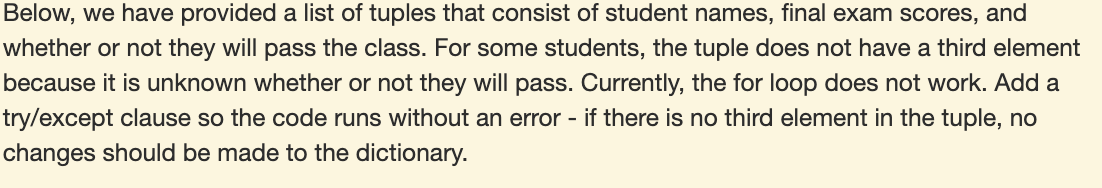

In [3]:

students = [('Timmy', 95, 'Will pass'), ('Martha', 70), ('Betty', 82, 'Will pass'), ('Stewart', 50, 'Will not pass'), ('Ashley', 68), ('Natalie', 99, 'Will pass'), ('Archie', 71), ('Carl', 45, 'Will not pass')]

passing = {'Will pass': 0, 'Will not pass': 0}


for tup in students:
    try:
        if tup[2] == 'Will pass':
            passing['Will pass'] += 1
        elif tup[2] == 'Will not pass':
            passing['Will not pass'] += 1
    except Exception:
        pass

print(passing)
        

{'Will pass': 3, 'Will not pass': 2}


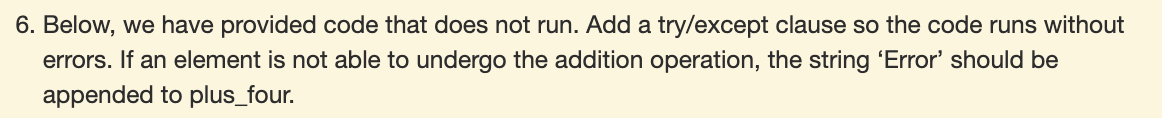

In [5]:

nums = [5, 9, '4', 3, 2, 1, 6, 5, '7', 4, 3, 2, 6, 7, 8, '0', 3, 4, 0, 6, 5, '3', 5, 6, 7, 8, '3', '1', 5, 6, 7, 9, 3, 2, 5, 6, '9', 2, 3, 4, 5, 1]

plus_four = []

for num in nums:
    try:
        plus_four.append(num+4)
    except Exception:
        plus_four.append('Error')

print(plus_four)

[9, 13, 'Error', 7, 6, 5, 10, 9, 'Error', 8, 7, 6, 10, 11, 12, 'Error', 7, 8, 4, 10, 9, 'Error', 9, 10, 11, 12, 'Error', 'Error', 9, 10, 11, 13, 7, 6, 9, 10, 'Error', 6, 7, 8, 9, 5]


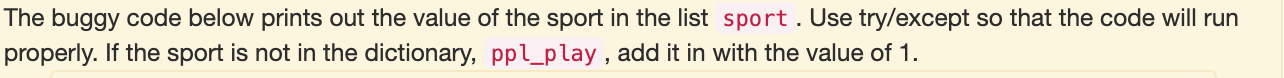

In [13]:

sport = ["hockey", "basketball", "soccer", "tennis", "football", "baseball"]

ppl_play = {"hockey":4, "soccer": 10, "football": 15, "tennis": 8}

for x in sport:
    try:
        print(ppl_play[x])
    except:
        ppl_play[x] = 1

print(ppl_play)
        

4
10
8
15
{'hockey': 4, 'soccer': 10, 'football': 15, 'tennis': 8, 'basketball': 1, 'baseball': 1}


In [15]:

di = [{"Puppies": 17, 'Kittens': 9, "Birds": 23, 'Fish': 90, "Hamsters": 49}, {"Puppies": 23, "Birds": 29, "Fish": 20, "Mice": 20, "Snakes": 7}, {"Fish": 203, "Hamsters": 93, "Snakes": 25, "Kittens": 89}, {"Birds": 20, "Puppies": 90, "Snakes": 21, "Fish": 10, "Kittens": 67}]
total = 0
for diction in di:
    try:
        total = total + diction['Puppies']
    except:
        diction['Puppies'] = 0
        
print("Total number of puppies:", total)

Total number of puppies: 130


## Final Project: Wheel of Fortune

In [34]:
import json
import random
import time

LETTERS = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

# Repeatedly asks the user for a number between min & max (inclusive)
def getNumberBetween(prompt, min, max):
    userinp = input(prompt) # ask the first time

    while True:
        try:
            n = int(userinp) # try casting to an integer
            if n < min:
                errmessage = 'Must be at least {}'.format(min)
            elif n > max:
                errmessage = 'Must be at most {}'.format(max)
            else:
                return n
        except ValueError: # The user didn't enter a number
            errmessage = '{} is not a number.'.format(userinp)

        # If we haven't gotten a number yet, add the error message
        # and ask again
        userinp = input('{}\n{}'.format(errmessage, prompt))

# Spins the wheel of fortune wheel to give a random prize
# Examples:
#    { "type": "cash", "text": "$950", "value": 950, "prize": "A trip to Ann Arbor!" },
#    { "type": "bankrupt", "text": "Bankrupt", "prize": false },
#    { "type": "loseturn", "text": "Lose a turn", "prize": false }
def spinWheel():
    with open("wheel.json", 'r') as f:
        wheel = json.loads(f.read())
        return random.choice(wheel)

# Returns a category & phrase (as a tuple) to guess
# Example:
#     ("Artist & Song", "Whitney Houston's I Will Always Love You")
def getRandomCategoryAndPhrase():
    with open("phrases.json", 'r') as f:
        phrases = json.loads(f.read())

        category = random.choice(list(phrases.keys()))
        phrase   = random.choice(phrases[category])
        return (category, phrase.upper())

# Given a phrase and a list of guessed letters, returns an obscured version
# Example:
#     guessed: ['L', 'B', 'E', 'R', 'N', 'P', 'K', 'X', 'Z']
#     phrase:  "GLACIER NATIONAL PARK"
#     returns> "_L___ER N____N_L P_RK"
def obscurePhrase(phrase, guessed):
    rv = ''
    for s in phrase:
        if (s in LETTERS) and (s not in guessed):
            rv = rv+'_'
        else:
            rv = rv+s
    return rv

# Returns a string representing the current state of the game
def showBoard(category, obscuredPhrase, guessed):
    return """
Category: {}
Phrase:   {}
Guessed:  {}""".format(category, obscuredPhrase, ', '.join(sorted(guessed)))

category, phrase = getRandomCategoryAndPhrase()

guessed = []
for x in range(random.randint(10, 20)):
    randomLetter = random.choice(LETTERS)
    if randomLetter not in guessed:
        guessed.append(randomLetter)

print("getRandomCategoryAndPhrase()\n -> ('{}', '{}')".format(category, phrase))

print("\n{}\n".format("-"*5))

print("obscurePhrase('{}', [{}])\n -> {}".format(phrase, ', '.join(["'{}'".format(c) for c in guessed]), obscurePhrase(phrase, guessed)))

print("\n{}\n".format("-"*5))

obscured_phrase = obscurePhrase(phrase, guessed)
print("showBoard('{}', '{}', [{}])\n -> {}".format(phrase, obscured_phrase, ','.join(["'{}'".format(c) for c in guessed]), showBoard(phrase, obscured_phrase, guessed)))

print("\n{}\n".format("-"*5))

num_times_to_spin = random.randint(2, 5)
print('Spinning the wheel {} times (normally this would just be done once per turn)'.format(num_times_to_spin))

for x in range(num_times_to_spin):
    print("\n{}\n".format("-"*2))
    print("spinWheel()")
    print(spinWheel())


print("\n{}\n".format("-"*5))

print("In 2 seconds, will run getNumberBetween('Testing getNumberBetween(). Enter a number between 1 and 10', 1, 10)")

time.sleep(2)

print(getNumberBetween('Testing getNumberBetween(). Enter a number between 1 and 10', 1, 10))


FileNotFoundError: [Errno 2] No such file or directory: 'phrases.json'

In [74]:
import random

LETTERS = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'


class WOFPlayer:
    
    def __init__(self, name):
        self.name = name
        self.prizeMoney = 0
        self.prizes = []
    
    def addMoney(self, amt):
        self.prizeMoney += amt
    
    def goBankrupt(self):
        self.prizeMoney = 0
    
    def addPrize(self,prize):
        self.prizes.append(prize)
        
    def __str__(self):
        return "{} (${})".format(self.name,self.prizeMoney) 

class WOFHumanPlayer(WOFPlayer):
    
    def getMove(self, category, obscuredPhrase, guessed):
        print("{} has ${}\n".format(self.name, self.prizeMoney))
        print("Catagory: {}".format(category))
        print("Phrase: {}".format(obscuredPhrase))
        print("Guessed: {}".format(guessed))
        
        input("Guess a letter, phrase, or type 'exit' or 'pass':")

class WOFComputerPlayer(WOFPlayer):
    SORTED_FREQUENCIES = 'ZQXJKVBPYGFWMUCLDRHSNIOATE'
    
    def __init__(self, name, difficulty):
        WOFPlayer.__init__(self, name)
        self.difficulty = difficulty
        
    def smartCoinFlip(self):
        rand_num = random.randint(1,10)
        if rand_num > self.difficulty:
            return True
        else:
            return False
    
    def getPossibleLetters(self, guessed):
        if self.prizeMoney >= VOWEL_COST:
            letterlist = [char for char in LETTERS if char not in guessed]
        else:
            letterlist = [char for char in LETTERS if char not in guessed if char not in VOWELS]
        return letterlist
    
    def getMove(self, category, obscuredPhrase, guessed):
        
        possible_letters = self.getPossibleLetters(guessed)
        if possible_letters == []:
            return 'pass'
        else:
            if self.smartCoinFlip == True:
                move = []
                for char in self.SORT_FREQUENCE:
                    if char in possible_letters:
                        move.append(char)
                return move[-1]
            else:
                return random.choice(self.getPossibleLetters(guessed))
                        
        
    
                
        
        
        
        
p = WOFHumanPlayer('Frank')
p.getMove(10,5,3)


Frank has $0

Catagory: 10
Phrase: 5
Guessed: 3
Guess a letter, phrase, or type 'exit' or 'pass':exit


## List Comprehension Trial

In [103]:
LETTERS = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
SORTED_FREQUENCIES = 'ZQXJKVBPYGFWMUCLDRHSNIOATE'
VOWELS = 'AEIOU'
guessed = 'ABZ'

letterlist = [char for char in LETTERS if char not in guessed]

print(letterlist)

letterlist1 = [char for char in LETTERS if char not in guessed if char not in VOWELS]

print(letterlist1)

possible_letters =['A','B','C']

possible_letters = 'CDDZT'
move =[]
for char in SORTED_FREQUENCIES:
    if char in possible_letters:
        move.append(char)

cc = move[-1]

print(cc)

['C', 'D', 'F', 'G', 'H', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'X', 'Y']
